In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [4]:
data = [25, 30, 35, 40, 45]
s = pd.Series(data, index=['A', 'B', 'C', 'D', 'E'])

first_three = s[:3]
mean_value = s.mean()
median_value = s.median()
std_dev = s.std()

print(first_three)
print(mean_value, median_value, std_dev)


A    25
B    30
C    35
dtype: int64
35.0 35.0 7.905694150420948


In [5]:
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Carol', 'David', 'Eve'],
    'Age': [20, 22, 19, 21, 20],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female'],
    'Marks': [85, 78, 92, 74, 88]
})

print(df.head(2))
print(df.columns)
print(df.dtypes)
print(df.describe())

df['Passed'] = df['Marks'] >= 80
print(df)


    Name  Age  Gender  Marks
0  Alice   20  Female     85
1    Bob   22    Male     78
Index(['Name', 'Age', 'Gender', 'Marks'], dtype='object')
Name      object
Age        int64
Gender    object
Marks      int64
dtype: object
             Age      Marks
count   5.000000   5.000000
mean   20.400000  83.400000
std     1.140175   7.334848
min    19.000000  74.000000
25%    20.000000  78.000000
50%    20.000000  85.000000
75%    21.000000  88.000000
max    22.000000  92.000000
    Name  Age  Gender  Marks  Passed
0  Alice   20  Female     85    True
1    Bob   22    Male     78   False
2  Carol   19  Female     92    True
3  David   21    Male     74   False
4    Eve   20  Female     88    True


In [7]:
name_marks = df[['Name', 'Marks']]
high_scorers = df[df['Marks'] > 80]
top_student = df.loc[df['Marks'].idxmax()]

print(name_marks)
print(high_scorers)
print(top_student)


    Name  Marks
0  Alice     85
1    Bob     78
2  Carol     92
3  David     74
4    Eve     88
    Name  Age  Gender  Marks  Passed
0  Alice   20  Female     85    True
2  Carol   19  Female     92    True
4    Eve   20  Female     88    True
Name       Carol
Age           19
Gender    Female
Marks         92
Passed      True
Name: 2, dtype: object


In [8]:
df.loc[1, 'Marks'] = None
df.loc[4, 'Age'] = None

missing_values = df.isnull()
df['Marks'].fillna(df['Marks'].mean(), inplace=True)
df_cleaned = df.dropna(subset=['Age'])

print(missing_values)
print(df)
print(df_cleaned)


    Name    Age  Gender  Marks  Passed
0  False  False   False  False   False
1  False  False   False   True   False
2  False  False   False  False   False
3  False  False   False  False   False
4  False   True   False  False   False
    Name   Age  Gender  Marks  Passed
0  Alice  20.0  Female  85.00    True
1    Bob  22.0    Male  84.75   False
2  Carol  19.0  Female  92.00    True
3  David  21.0    Male  74.00   False
4    Eve   NaN  Female  88.00    True
    Name   Age  Gender  Marks  Passed
0  Alice  20.0  Female  85.00    True
1    Bob  22.0    Male  84.75   False
2  Carol  19.0  Female  92.00    True
3  David  21.0    Male  74.00   False


C:\Users\ujjwa\AppData\Local\Temp\ipykernel_13956\2852622658.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marks'].fillna(df['Marks'].mean(), inplace=True)


In [9]:
grouped = df.groupby('Gender').agg({'Age': 'mean', 'Marks': 'mean'})
gender_counts = df['Gender'].value_counts()

print(grouped)
print(gender_counts)


         Age      Marks
Gender                 
Female  19.5  88.333333
Male    21.5  79.375000
Gender
Female    3
Male      2
Name: count, dtype: int64


In [10]:
df.to_csv('students_data.csv', index=False)
df_loaded = pd.read_csv('students_data.csv')

print(df_loaded.head())


    Name   Age  Gender  Marks  Passed
0  Alice  20.0  Female  85.00    True
1    Bob  22.0    Male  84.75   False
2  Carol  19.0  Female  92.00    True
3  David  21.0    Male  74.00   False
4    Eve   NaN  Female  88.00    True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age       sibsp       parch        f

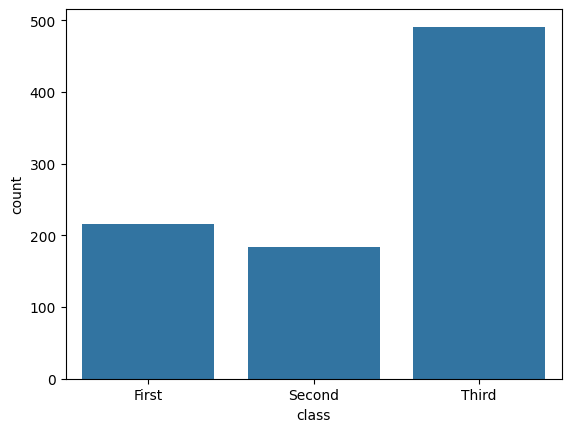

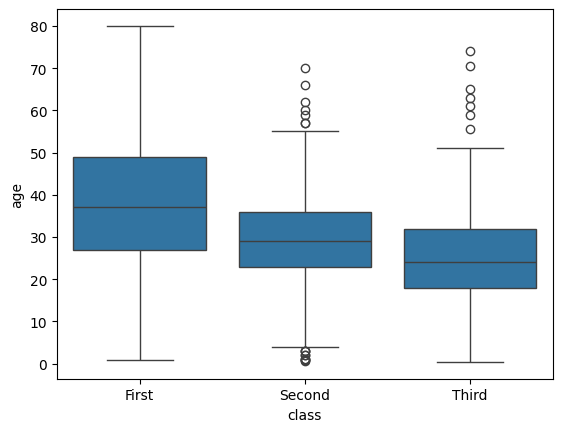

In [11]:
sample_data = sns.load_dataset('titanic')

print(sample_data.info())
print(sample_data.describe())
print(sample_data.isnull().sum())

sns.countplot(x='class', data=sample_data)
plt.show()

sns.boxplot(x='class', y='age', data=sample_data)
plt.show()
